In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
import missingno as msno

In [ ]:
#imports from sklearn library
from sklearn import datasets
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.svm import LinearSVR, SVR, NuSVR
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
train = pd.read_csv('/content/sample_data/california_housing_train.csv')
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
test = pd.read_csv('/content/sample_data/california_housing_test.csv')
test.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [ ]:
##merged data
merged_df = pd.merge(train, test)
merged_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value


In [ ]:
train.columns=map(str.lower,train.columns)
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB


###EDA


Text(0.5, 1.0, 'Missing Values Heatmap')

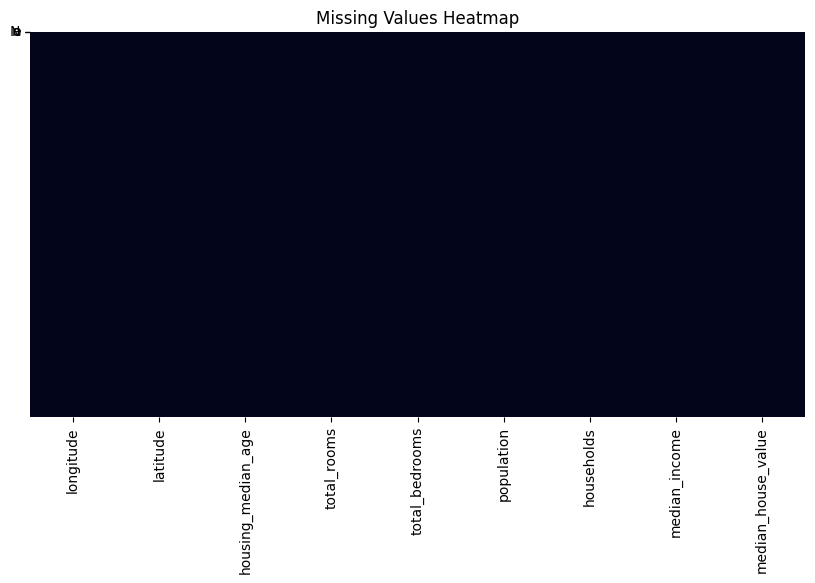

In [ ]:
# Explore missingness
plt.figure(figsize=(10,5))

sns.heatmap(train.isnull(), yticklabels="None", cbar=False)
plt.title("Missing Values Heatmap")

Text(0.5, 1.0, 'Missing Values Heatmap')

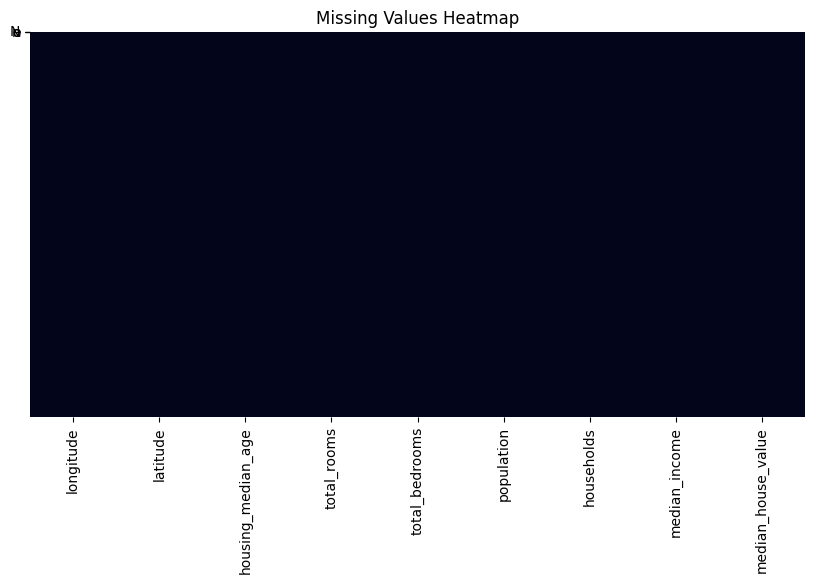

In [ ]:
plt.figure(figsize=(10,5))

sns.heatmap(test.isnull(), yticklabels="None", cbar=False)
plt.title("Missing Values Heatmap")

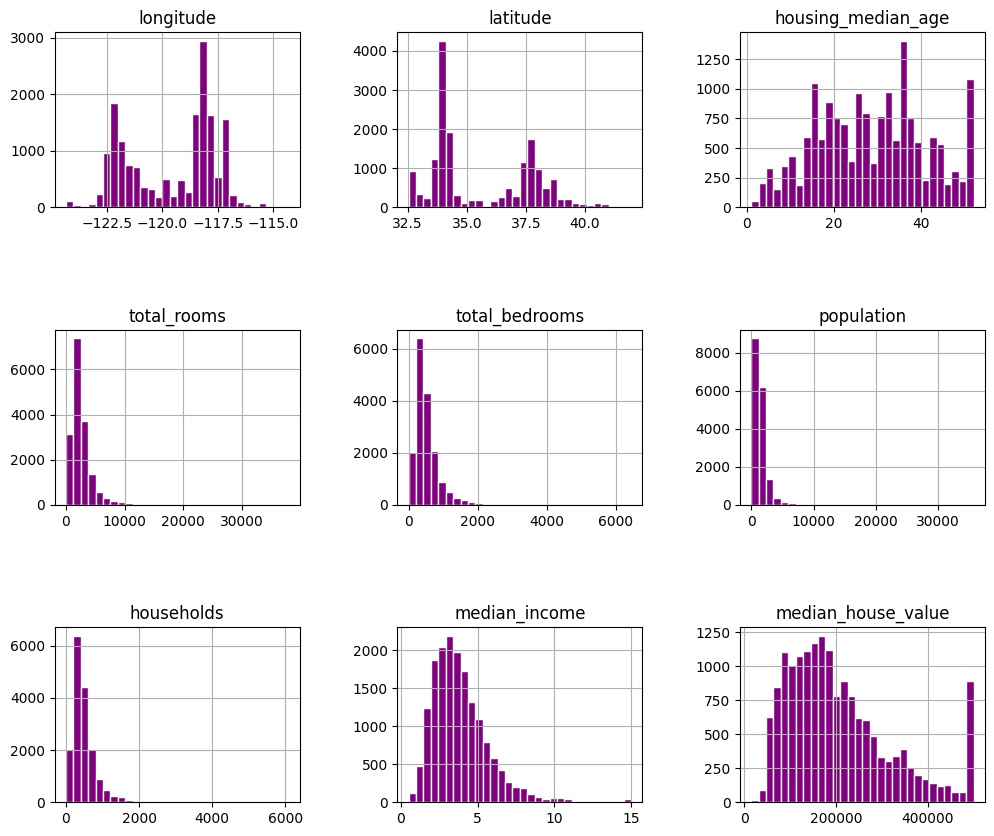

In [ ]:
train.hist(figsize=(12, 10), bins=30, color="purple", edgecolor='white')
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [ ]:
# Eploring outliers
features = ['total_rooms','total_bedrooms','population','households','median_income']
train[features].describe()

,total_rooms,total_bedrooms,population,households,median_income
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,2643.664412,539.410824,1429.573941,501.221941,3.883578
std,2179.947071,421.499452,1147.852959,384.520841,1.908157
min,2.000000,1.000000,3.000000,1.000000,0.499900
25%,1462.000000,297.000000,790.000000,282.000000,2.566375
50%,2127.000000,434.000000,1167.000000,409.000000,3.544600
75%,3151.250000,648.250000,1721.000000,605.250000,4.767000
max,37937.000000,6445.000000,35682.000000,6082.000000,15.000100


###Feature enginneering - transforming categorical variables for regression \problems, outlier detection


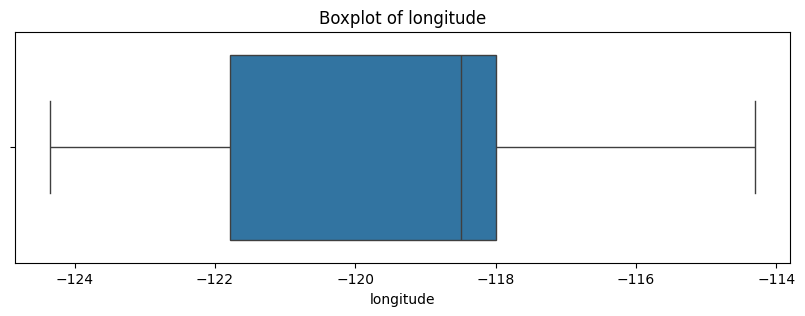

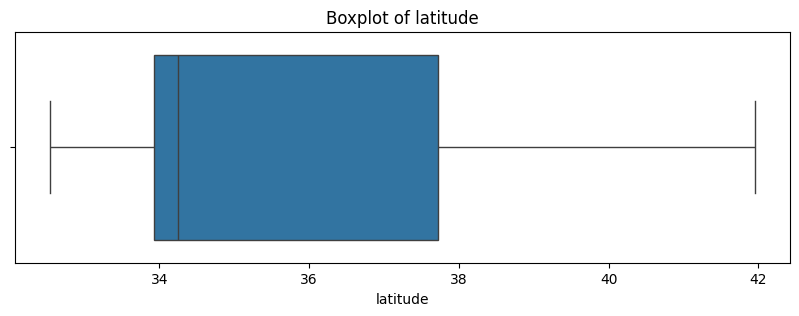

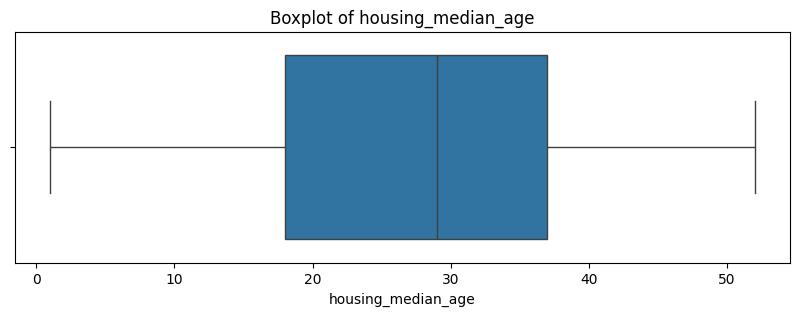

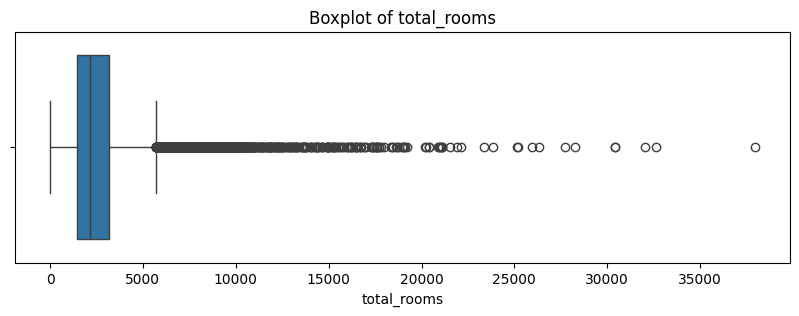

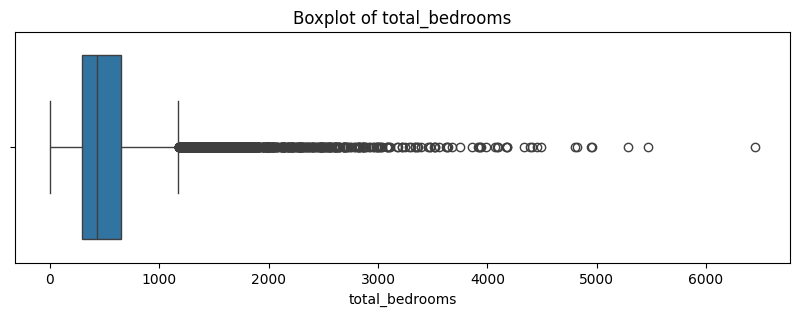

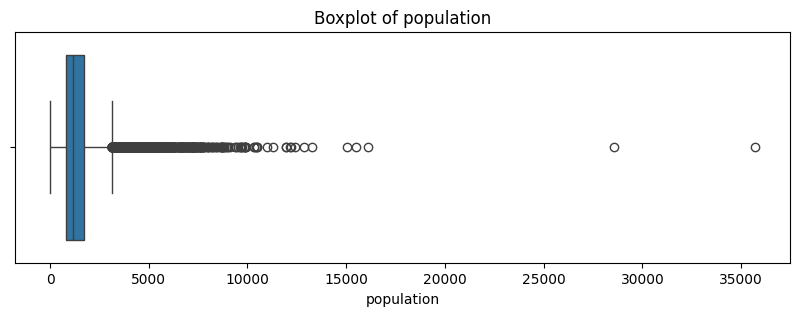

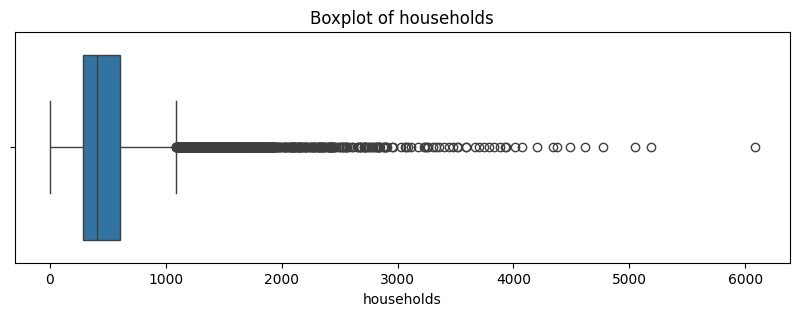

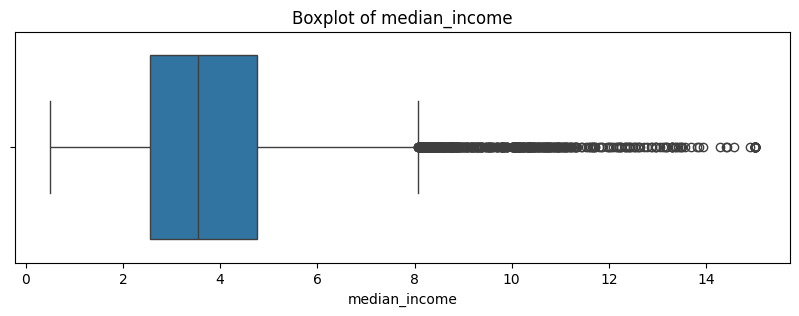

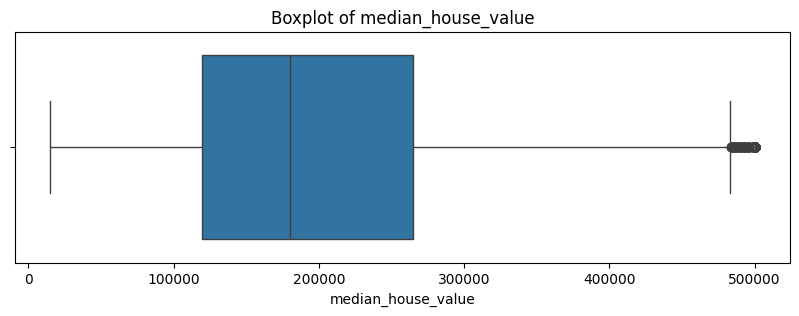

In [ ]:
##outlier detection using box plot for train.csv
for col in train.select_dtypes(include=['float64']):
  plt.figure(figsize=(10, 3))
  sns.boxplot(x=train[col])
  plt.title(f'Boxplot of {col}')
  plt.show()


In [ ]:
from sklearn.datasets import fetch_california_housing

housing_data = fetch_california_housing()
X = housing_data.data
y = housing_data.target



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(14448, 8)
(6192, 8)
(14448,)
(6192,)


###Categorical imputation

In [ ]:
categorical=train['median_house_value'].fillna(train['median_house_value'].value_counts().idxmax(), inplace=True)


categorical


###Feature Selection - PCA

In [ ]:
pipe = make_pipeline(StandardScaler(),PolynomialFeatures(degree=1),LinearRegression())
scores = cross_val_score(pipe, test, train, cv=5, scoring='r2')

print(scores, scores.mean())

ValueError: Found input variables with inconsistent numbers of samples: [3000, 17000]

REGRESSION MODEL

In [ ]:
X = train.drop(columns=['median_house_value'])
y = train['median_house_value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
#r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
#print("R-squared:", r2)

Mean Squared Error: 4634658406.223264
Root Mean Squared Error: 68078.32552452553
